#Cover Song Analyzer ML Model

This notebook contains code intended to evaluate the pitch accuracy of a singing performance in comparison to an audio track. It is done by separating the audio track from the accompanied musical instrument and comparing the variation of pitches of the two audio tracks with time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
# Navigate to your specific directory
os.chdir('/content/drive/My Drive/Research/CSAnalyzer')
# Now you are in the desired directory and can perform your file operations


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


install python bindings for FFmpeg - with complex filtering support

In [ ]:
!pip install ffmpeg

Install Initial modules to be fixed the Spleeter Issues

In [ ]:
!pip install --upgrade pip setuptools
!pip install --upgrade cython
!pip install numpy
!pip install SpeechRecognition

install python bindings for spleeter - with complex audio separation support

In [ ]:
!pip install spleeter

Initial Imports

In [ ]:
import os
from spleeter.separator import Separator
from scipy.interpolate import interp1d
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr
import ffmpeg

Use *spleeter* to separate vocals from the original music file.

In [ ]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = '/content/drive/MyDrive/Research/CSAnalyzer/audio1.mp3'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data = separator.separate_to_file(input_audio_file, output_directory)

print("Original Audio Separation complete.")

Exception ignored in: <generator object Estimator.predict at 0x7f472979dee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/estimator.py", line 618, in predict
    with tf.Graph().as_default() as g:
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py", line 5821, in get_controller
    with super(_DefaultGraphStack,
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py", line 5633, in get_controller
    raise AssertionError(
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.ops.Graph'> objects


INFO:spleeter:File ./separated_recordings/audio1/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/accompaniment.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio1/accompaniment.wav written succesfully


Original Audio Separation complete.


Generate text array Using the audio clip one for lyrics.

In [ ]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text1 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text1)

when the night has come and the land is dark in the Moon is the only Lightning McQueen


convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [ ]:
text_array1 = text1.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences1 = text1.split('.')

Separate cover audio from the cover video file.

In [ ]:
# input_file = 'video.mp4'
# output_file = 'audio2.mp3'

# ffmpeg.input(input_file).output(output_file, f='mp3').run()

Use *spleeter* to separate vocals from the cover music file.

In [ ]:
# Path to the Spleeter model. You can change it to the desired model.
spleeter_model = 'spleeter:2stems'

# Initialize the Spleeter separator
separator = Separator(spleeter_model)

# Path to the input audio file (WAV format)
input_audio_file = '/content/drive/MyDrive/Research/CSAnalyzer/audio2.mp3'

# Output directory for the separated audio files
output_directory = './separated_recordings'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform the separation
audio_data2 = separator.separate_to_file(input_audio_file, output_directory)

print("Cover Song Audio Separation complete.")

INFO:spleeter:File ./separated_recordings/audio2/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/vocals.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/accompaniment.wav written succesfully


INFO:spleeter:File ./separated_recordings/audio2/accompaniment.wav written succesfully


Cover Song Audio Separation complete.


Generate text array Using the audio clip one for lyrics.

In [ ]:
# Initialize the recognizer
recognizer = sr.Recognizer()

# Load the audio file
audio_file = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav"

with sr.AudioFile(audio_file) as source:
    # Adjust for ambient noise, if necessary
    recognizer.adjust_for_ambient_noise(source)

    # Record the audio
    audio_data = recognizer.record(source)

# Transcribe the audio to text
text2 = recognizer.recognize_google(audio_data)  # You can use other engines too

print(text2)

what does


convert it into a text array by splitting it into words or sentences using Python's string manipulation functions

In [ ]:
text_array2 = text2.split()  # Split by spaces to get individual words

# Or, split by sentences if needed
sentences2 = text2.split('.')

Extract pitch information from separated audio files using *librosa* python library.

In [ ]:
# Paths to the separated audio files (voice and instrument)
original_audio_file = '/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav'
cover_audio_file = '/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav'

# original_audio_file = "/content/drive/MyDrive/Research/CSAnalyzer/audio1.mp3"
# cover_audio_file = "/content/drive/MyDrive/Research/CSAnalyzer/audio2.mp3"

# Load the original audio file
y_original_voice, sr_voice = librosa.load(original_audio_file)

# Load the cover audio file
y_cover_voice, sr_instrument = librosa.load(cover_audio_file)

# Extract the pitch information using librosa.piptrack for the original clip
f0_original_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_original_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Extract the pitch information using librosa.piptrack for the cover clip
f0_cover_audio, voiced_flag, voiced_probs = librosa.pyin(y=y_cover_voice, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

Load Audio Files in Wave Form

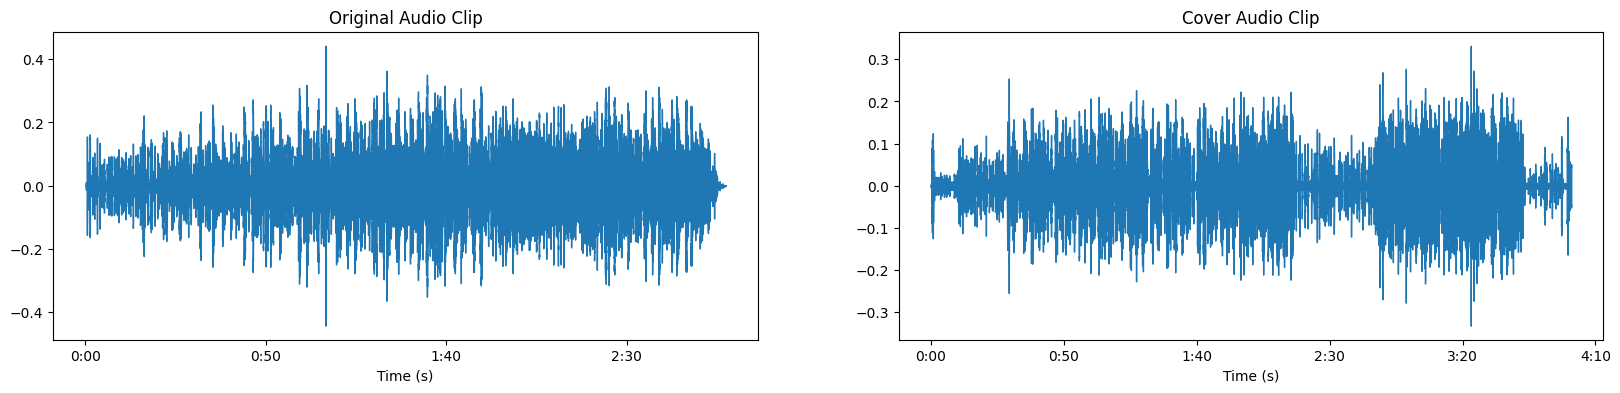

In [ ]:
audio_file1 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav"
audio_file2 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav"
y, sr = librosa.load(audio_file1)
x, sr = librosa.load(audio_file2)

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Clip')
plt.xlabel('Time (s)')

plt.subplot(1, 2, 2)
librosa.display.waveshow(x, sr=sr)
plt.title('Cover Audio Clip')
plt.xlabel('Time (s)')
plt.show()


Generate Spectrogram

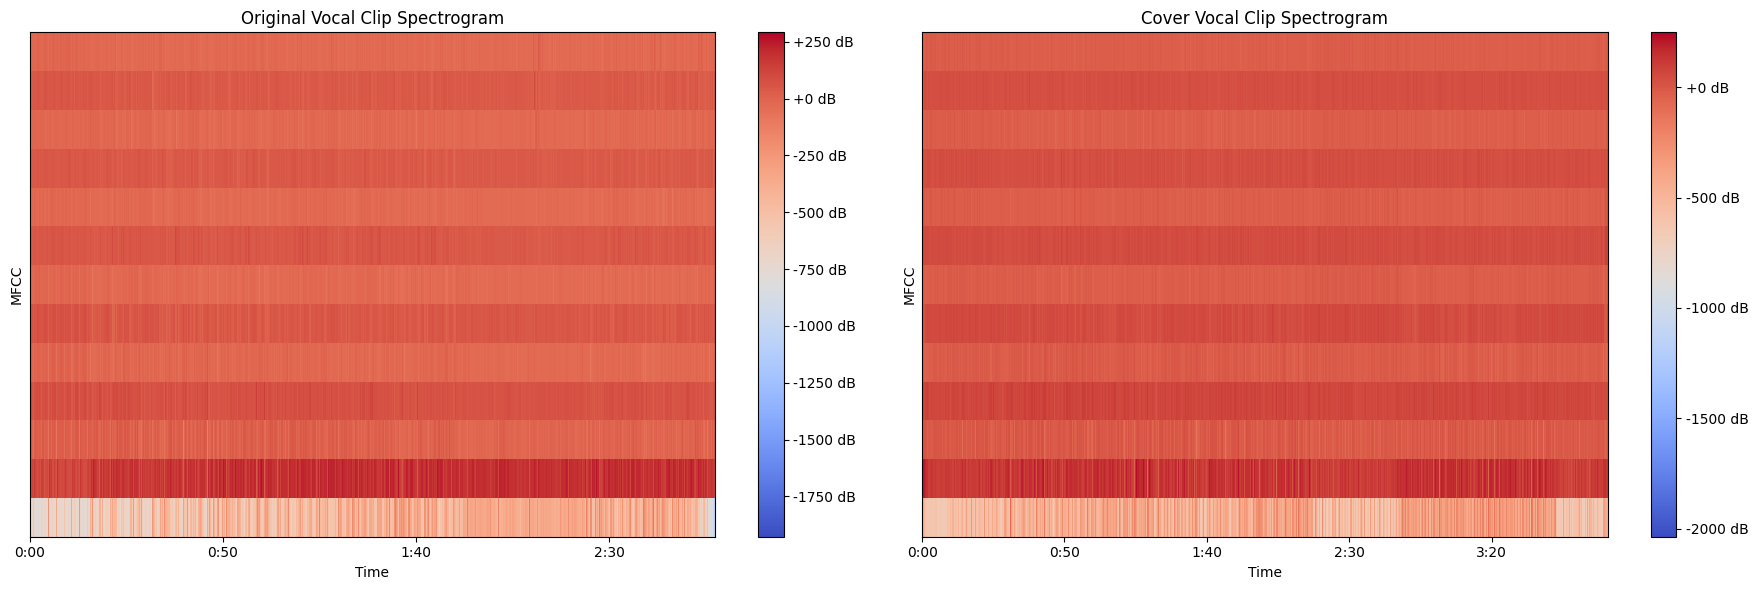

In [ ]:
# Assuming the audio file paths are correctly provided and the files exist at those paths.
audio_file01 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav"
audio_file02 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav"

# Load the audio files with librosa
clip1, sr = librosa.load(audio_file01, sr=22050)
clip2, sr = librosa.load(audio_file02, sr=22050)

# No need to do FFT twice, and you need to use np.abs to get the magnitude
fft1 = np.fft.fft(clip1)
fft2 = np.fft.fft(clip2)

magnitude1 = np.abs(fft1)
frequency1 = np.linspace(0, sr, len(magnitude1))
left_frequency1 = frequency1[:int(len(frequency1)/2)]
left_magnitude1 = magnitude1[:int(len(frequency1)/2)]

magnitude2 = np.abs(fft2)
frequency2 = np.linspace(0, sr, len(magnitude2))
left_frequency2 = frequency2[:int(len(frequency2)/2)]
left_magnitude2 = magnitude2[:int(len(frequency2)/2)]

# Set the parameters for the Short-Time Fourier Transform (STFT)
n_fft = 2048
hop_length = 512

# Compute the STFT and the spectrogram for each clip
stft1 = librosa.core.stft(clip1, hop_length=hop_length, n_fft=n_fft)
spectrogram1 = np.abs(stft1)

stft2 = librosa.core.stft(clip2, hop_length=hop_length, n_fft=n_fft)
spectrogram2 = np.abs(stft2)

# Create a figure with two subplots in a single row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first spectrogram on the left subplot
mfcc1 = librosa.feature.mfcc(S=librosa.power_to_db(spectrogram1), n_mfcc=13)
img1 = librosa.display.specshow(mfcc1, sr=sr, hop_length=hop_length, x_axis='time', ax=axes[0])
axes[0].set_xlabel('Time')
axes[0].set_ylabel('MFCC')
axes[0].set_title('Original Vocal Clip Spectrogram')

# Add a color bar to the first spectrogram
fig.colorbar(img1, ax=axes[0], format="%+2.f dB")

# Plot the second spectrogram on the right subplot
mfcc2 = librosa.feature.mfcc(S=librosa.power_to_db(spectrogram2), n_mfcc=13)
img2 = librosa.display.specshow(mfcc2, sr=sr, hop_length=hop_length, x_axis='time', ax=axes[1])
axes[1].set_xlabel('Time')
axes[1].set_ylabel('MFCC')
axes[1].set_title('Cover Vocal Clip Spectrogram')

# Add a color bar to the second spectrogram
fig.colorbar(img2, ax=axes[1], format="%+2.f dB")

# Show the plots
plt.tight_layout()  # Adjust the layout so that the color bars fit
plt.show()


Spectrograms Comparition

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to load an audio file and extract MFCCs
def extract_mfcc(audio_file, n_mfcc=20, n_fft=2048, hop_length=512):
    clip, sr = librosa.load(audio_file, sr=22050)
    spectrogram = np.abs(librosa.stft(clip, n_fft=n_fft, hop_length=hop_length))
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(spectrogram), n_mfcc=n_mfcc)
    return mfcc

# Load and process the audio files
audio_file01 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav"
audio_file02 = "/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav"

mfcc1 = extract_mfcc(audio_file01)
mfcc2 = extract_mfcc(audio_file02)

print("Shape of mfcc1:", mfcc1.shape)
print("Shape of mfcc2:", mfcc2.shape)

Shape of mfcc1: (20, 7644)
Shape of mfcc2: (20, 10375)


In [ ]:
# # Assume mfcc1 and mfcc2 are your MFCCs prepared from the original and cover songs, respectively
# # Ensure they have the same shape by padding if necessary
# max_shape = max(mfcc1.shape[1], mfcc2.shape[1])
# mfcc1_padded = np.pad(mfcc1, ((0, 0), (0, max_shape - mfcc1.shape[1])), mode='constant')
# mfcc2_padded = np.pad(mfcc2, ((0, 0), (0, max_shape - mfcc2.shape[1])), mode='constant')

# # # Pad the MFCCs to increase spatial dimensions
# # mfcc1_padded = np.pad(mfcc1_padded, ((0, 0), (1, 1), (1, 1)), mode='constant')
# # mfcc2_padded = np.pad(mfcc2_padded, ((0, 0), (1, 1), (1, 1)), mode='constant')

# # # Combine the padded MFCCs
# # X_train = np.stack([mfcc1_padded, mfcc2_padded], axis=-1)

# # # Reshape X_train to fit the model's expected input
# # X_train_reshaped = X_train[..., np.newaxis]

# # # Update the input shape to reflect the padded MFCCs
# # input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2], X_train_reshaped.shape[3])

# # # Define the model (with the original kernel size of (3, 3))
# # model = Sequential([
# #     Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
# #     MaxPooling2D((2, 2)),
# #     Conv2D(64, (3, 3), activation='relu'),
# #     MaxPooling2D((2, 2)),
# #     Flatten(),
# #     Dense(128, activation='relu'),
# #     Dropout(0.5),
# #     Dense(1, activation='sigmoid')
# # ])

# # # Compile the model
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # # Placeholder labels: 1 for similar, 0 for not similar
# # y_train = np.array([1])  # Example: assuming they are similar

# # # Train the model - using a single pair for demonstration; in practice, use your full dataset
# # model.fit(X_train_reshaped, y_train, epochs=10, batch_size=1, verbose=1)

# # Pad the MFCCs to increase spatial dimensions
# # Adjust the padding parameters based on the printed shapes
# if mfcc1_padded.shape[1] >= 3 and mfcc2_padded.shape[1] >= 3:
#     mfcc1_padded = np.pad(mfcc1_padded, ((0, 0), (0, 0), (1, 1)), mode='constant')
#     mfcc2_padded = np.pad(mfcc2_padded, ((0, 0), (0, 0), (1, 1)), mode='constant')
# else:
#     print("Error: The MFCCs have an incompatible shape for padding.")
#     raise ValueError("The MFCCs have an incompatible shape for padding.")

# # Combine the padded MFCCs
# X_train = np.stack([mfcc1_padded, mfcc2_padded], axis=-1)

# # Reshape X_train to fit the model's expected input
# X_train_reshaped = X_train[..., np.newaxis]

# # Update the input shape to reflect the padded MFCCs
# input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2], X_train_reshaped.shape[3])

# # Define the model (with the original kernel size of (3, 3))
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Placeholder labels: 1 for similar, 0 for not similar
# y_train = np.array([1])  # Example: assuming they are similar

# # Train the model - using a single pair for demonstration; in practice, use your full dataset
# model.fit(X_train_reshaped, y_train, epochs=10, batch_size=1, verbose=1)

Plot variation of pitches of accompanied music track and singing voice with time.

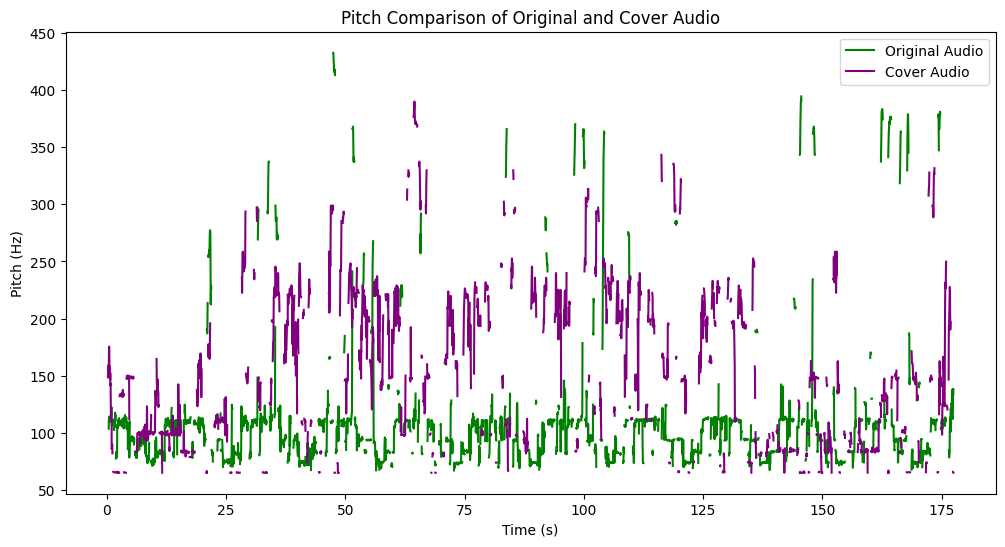

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load your audio files first - you need to have these loaded as y_original and y_cover
y_original, sr_original = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav')
y_cover, sr_cover = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav')

# Compute the fundamental frequency for both the original and cover audio tracks
f0_original_audio, voiced_flag_original, voiced_probs_original = librosa.pyin(y_original, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_cover_audio, voiced_flag_cover, voiced_probs_cover = librosa.pyin(y_cover, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Create time vectors for both the original and cover tracks
times_original = librosa.times_like(f0_original_audio, sr=sr_original)
times_cover = librosa.times_like(f0_cover_audio, sr=sr_cover)

# Interpolate the cover track pitch to match the original track time vector if they are of different lengths
if len(f0_original_audio) != len(f0_cover_audio):
    interp_func = interp1d(times_cover, f0_cover_audio, bounds_error=False, fill_value="extrapolate")
    f0_cover_audio_interp = interp_func(times_original)
    times_cover = times_original
else:
    f0_cover_audio_interp = f0_cover_audio

# Now you can plot both arrays
plt.figure(figsize=(12, 6))
plt.plot(times_original, f0_original_audio, label='Original Audio', color='green')
plt.plot(times_cover, f0_cover_audio_interp, label='Cover Audio', color='purple')
plt.title('Pitch Comparison of Original and Cover Audio')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend(loc='upper right')
plt.show()

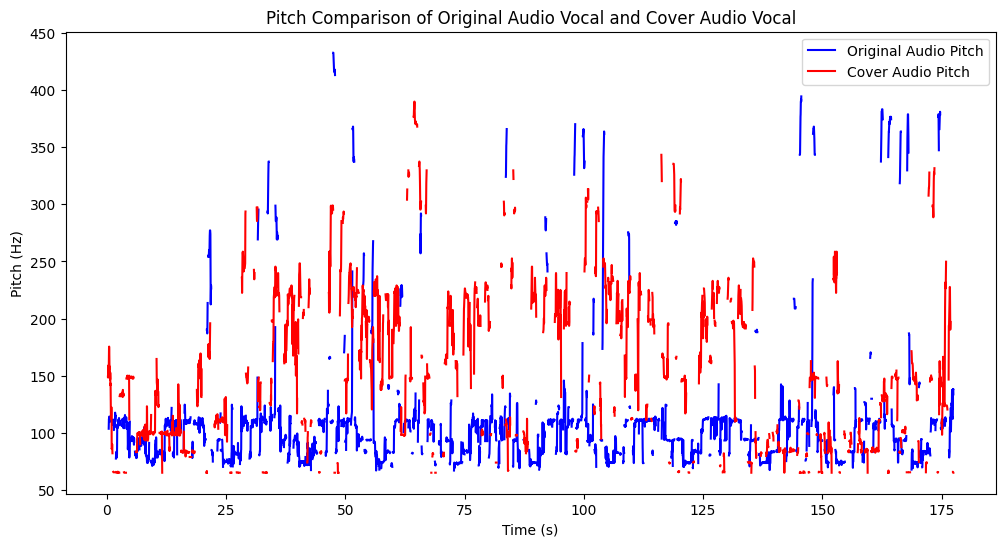

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load your audio files first - you need to have these loaded as y_original and y_cover
y_original, sr_original = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav')
y_cover, sr_cover = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav')

# Compute the fundamental frequency for both the original and cover audio tracks
f0_original_audio, voiced_flag_original, voiced_probs_original = librosa.pyin(y_original, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_cover_audio, voiced_flag_cover, voiced_probs_cover = librosa.pyin(y_cover, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Create time vectors for both the original and cover tracks
times_original = librosa.times_like(f0_original_audio, sr=sr_original)
times_cover = librosa.times_like(f0_cover_audio, sr=sr_cover)

# Interpolate the cover track pitch to match the original track time vector if they are of different lengths
if len(f0_original_audio) != len(f0_cover_audio):
    interp_func = interp1d(times_cover, f0_cover_audio, bounds_error=False, fill_value="extrapolate")
    f0_cover_audio_interp = interp_func(times_original)
    times_cover = times_original
else:
    f0_cover_audio_interp = f0_cover_audio

# Now you can plot both arrays
plt.figure(figsize=(12, 6))
plt.plot(times_original, f0_original_audio, label='Original Audio Pitch', color='blue')
plt.plot(times_cover, f0_cover_audio_interp, label='Cover Audio Pitch', color='red')
plt.title('Pitch Comparison of Original Audio Vocal and Cover Audio Vocal')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load your audio files first - you need to have these loaded as y_original and y_cover
y_original, sr_original = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio1/vocals.wav')
y_cover, sr_cover = librosa.load('/content/drive/MyDrive/Research/CSAnalyzer/separated_recordings/audio2/vocals.wav')

# Compute the fundamental frequency for both the original and cover audio tracks
f0_original_audio, voiced_flag_original, voiced_probs_original = librosa.pyin(y_original, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_cover_audio, voiced_flag_cover, voiced_probs_cover = librosa.pyin(y_cover, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Create time vectors for both the original and cover tracks
times_original = librosa.times_like(f0_original_audio, sr=sr_original)
times_cover = librosa.times_like(f0_cover_audio, sr=sr_cover)

# Interpolate the cover track pitch to match the original track time vector if they are of different lengths
if len(f0_original_audio) != len(f0_cover_audio):
    interp_func = interp1d(times_cover, f0_cover_audio, bounds_error=False, fill_value="extrapolate")
    f0_cover_audio_interp = interp_func(times_original)
    times_cover = times_original
else:
    f0_cover_audio_interp = f0_cover_audio

# Calculate the absolute difference between the pitches
pitch_diff = np.abs(f0_original_audio - f0_cover_audio_interp)

# Compute statistics
mean_diff = np.mean(pitch_diff)
median_diff = np.median(pitch_diff)
std_diff = np.std(pitch_diff)

# Create a table with the statistics
data = {'Statistic': ['Mean Difference', 'Median Difference', 'Standard Deviation'],
        'Value': [mean_diff, median_diff, std_diff]}
similarity_table = pd.DataFrame(data)

# Display the table
print("Pitch Similarity Statistics:")
print(similarity_table)

Pitch Similarity Statistics:
            Statistic  Value
0     Mean Difference    NaN
1   Median Difference    NaN
2  Standard Deviation    NaN


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Assuming y_original and y_cover are loaded

# Compute the fundamental frequency for both the original and cover audio tracks
f0_original_audio, voiced_flag_original, voiced_probs_original = librosa.pyin(y_original, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_cover_audio, voiced_flag_cover, voiced_probs_cover = librosa.pyin(y_cover, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Create time vectors for both the original and cover tracks
times_original = librosa.times_like(f0_original_audio, sr=sr_original)
times_cover = librosa.times_like(f0_cover_audio, sr=sr_cover)

# Interpolate both tracks to match a common time vector
common_time_vector = np.linspace(0, max(times_original[-1], times_cover[-1]), num=max(len(times_original), len(times_cover)))

interp_func_original = interp1d(times_original, f0_original_audio, bounds_error=False, fill_value="extrapolate")
f0_original_interp = interp_func_original(common_time_vector)

interp_func_cover = interp1d(times_cover, f0_cover_audio, bounds_error=False, fill_value="extrapolate")
f0_cover_interp = interp_func_cover(common_time_vector)

# Handling NaN values by interpolating or using a method to fill them
f0_original_interp_filled = np.nan_to_num(f0_original_interp, nan=np.nanmean(f0_original_interp))
f0_cover_interp_filled = np.nan_to_num(f0_cover_interp, nan=np.nanmean(f0_cover_interp))

# Calculate the absolute difference between the pitches after handling NaNs
pitch_diff = np.abs(f0_original_interp_filled - f0_cover_interp_filled)

# Compute statistics
mean_diff = np.mean(pitch_diff)
median_diff = np.median(pitch_diff)
std_diff = np.std(pitch_diff)

# Create a table with the statistics
data = {'Statistic': ['Mean Difference', 'Median Difference', 'Standard Deviation'],
        'Value': [mean_diff, median_diff, std_diff]}
similarity_table = pd.DataFrame(data)

# Display the table
print("Pitch Similarity Statistics:")
print(similarity_table)


Pitch Similarity Statistics:
            Statistic        Value
0     Mean Difference  2278.043613
1   Median Difference   252.181928
2  Standard Deviation  3271.784168


Calculate a score for the singing performance based on the Original vocal pitch and the cover song vocal pitch.

No marks will be given if the pitch difference is higher than 100 Hz.

**Marks are calculated out of 100**.

In [ ]:
# Calculate time step (frame size in seconds)
frame_length = len(f0_original_audio) / len(y_original_voice)

# Initialize variables for scoring
total_marks = 0
max_possible_marks = 0

# Iterate through pitch data and calculate marks
for i in range(len(f0_original_audio)):
    pitch_original_voice = f0_original_audio[i]
    pitch_cover_voice = f0_cover_audio[i]

    if not np.isnan(pitch_original_voice) and not np.isnan(pitch_cover_voice):
        pitch_difference = abs(pitch_original_voice - pitch_cover_voice)

        if pitch_difference < 1.0:
            marks = 100
        elif pitch_difference < 5.0:
            marks = 90
        elif pitch_difference < 10.0:
            marks = 80
        elif pitch_difference < 20.0:
          marks = 70
        elif pitch_difference < 30.0:
            marks = 60
        elif pitch_difference < 40.0:
            marks = 50
        elif pitch_difference < 50.0:
            marks = 40
        elif pitch_difference < 70.0:
            marks = 30
        elif pitch_difference < 80.0:
            marks = 20
        elif pitch_difference < 100.0:
            marks = 10
        else:
            marks = 0
    else:
        marks = 0

    # Update total marks
    total_marks += marks

    # Update the maximum possible marks
    max_possible_marks += 100  # Assuming each second can earn a maximum of 10 marks

# Normalize the final marks to a 0-10 scale
final_marks = (total_marks / max_possible_marks) * 100

# Print the final marks
print(f'Final Marks out of 100: {final_marks:.2f}')

In [ ]:
import numpy as np

def calculate_singing_score(f0_original, f0_cover, sr):
    # Calculate the time step (frame size in seconds)
    frame_length = len(y_original_voice) / sr / len(f0_original)

    # Initialize variables for scoring
    total_marks = 0
    max_possible_marks = 0

    # Iterate through pitch data and calculate marks
    for i in range(len(f0_original)):
        pitch_original_voice = f0_original[i]
        pitch_cover_voice = f0_cover[i]

        if not np.isnan(pitch_original_voice) and not np.isnan(pitch_cover_voice):
            pitch_difference = abs(pitch_original_voice - pitch_cover_voice)

            # Marking rubric based on the pitch difference
            if pitch_difference < 1.0:
                marks = 100
            elif pitch_difference < 5.0:
                marks = 90
            # ... (continue with your rubric)
            elif pitch_difference < 100.0:
                marks = 10
            else:
                marks = 0  # No marks if the difference is 100 Hz or more

            # Update total marks
            total_marks += marks

        # Update the maximum possible marks
        max_possible_marks += 100  # Assuming each frame can earn a maximum of 100 marks

    # Normalize the final marks to a 0-100 scale
    final_score = (total_marks / max_possible_marks) * 100

    return final_score

# Usage:
# Assuming f0_original_audio and f0_cover_audio are already computed and interpolated
final_marks = calculate_singing_score(f0_original_audio, f0_cover_audio, sr)
print(f'Final Marks out of 100: {final_marks:.2f}/100')


Calculate a score for the singing performance based on the Original song lyrics and the cover song lyrics.

No marks will be given if the pitch difference is higher than 100 Hz.

**Marks are calculated out of 100.**

In [ ]:
# a = np.array(sentences1)
# b = np.array(sentences2)

# print(sentencNes1)
# print(sentences2)

def compare_string_lists(list1, list2):
    # Ensure the first list is always the longest
    if len(list2) > len(list1):
        list1, list2 = list2, list1

    # Check if lists are equal
    are_equal = list1 == list2
    # Count matching elements
    matches = sum(el1 == el2 for el1, el2 in zip(list1, list2))
    # Calculate the percentage of similarity based on the longest list
    similarity_percentage = (matches / len(list1)) * 100

    return are_equal, similarity_percentage

# Example usage:
list_a = sentences1
list_b = sentences2

print(f'Text Array 1 : {sentences1}')
print(f'Text Array 2 : {sentences2}')

# Check if the lists are equal and find the percentage of their equality
equal, percentage = compare_string_lists(list_a, list_b)
print(f"Are the text lists equal? {equal}")
print(f"Percentage of equality: {percentage:.2f}%")



In [ ]:
# import numpy as np
# import librosa

# # Function to load an audio file and create its spectrogram
# def create_spectrogram(audio_path):
#     y, sr = librosa.load(audio_path)
#     D = librosa.stft(y, n_fft=2048, hop_length=512)
#     S = np.abs(D)
#     return S, sr

# # Function to estimate the predominant pitch of a spectrogram
# def estimate_pitch(y, sr, fmin=50.0, fmax=2000.0):
#     pitches, magnitudes = librosa.piptrack(y=y, sr=sr, fmin=fmin, fmax=fmax)
#     index_of_maximum = np.argmax(magnitudes, axis=0)
#     pitches = pitches[index_of_maximum, range(pitches.shape[1])]
#     pitches = pitches[pitches > 0]
#     if len(pitches) == 0:
#         return 0
#     return np.mean(pitches)

# # Function to calculate the pitch difference between two spectrograms
# def calculate_pitch_difference(spectrogram1, sr1, spectrogram2, sr2):
#     pitch1 = estimate_pitch(spectrogram1, sr1)
#     pitch2 = estimate_pitch(spectrogram2, sr2)
#     pitch_difference = abs(pitch1 - pitch2)
#     return pitch_difference

# # Function to pair spectrograms and calculate the pitch differences
# def pair_spectrograms_and_labels(audio_files):
#     spectrogram_pairs = []
#     pitch_diffs = []

#     for i in range(len(audio_files) - 1):
#         # Create spectrograms for the pair of audio files
#         S1, sr1 = create_spectrogram(audio_files[i])
#         S2, sr2 = create_spectrogram(audio_files[i + 1])

#         # Pair them by stacking along a new dimension
#         paired_spectrogram = np.stack((S1, S2), axis=-1)

#         # Calculate the pitch difference for the pair
#         pitch_diff = calculate_pitch_difference(S1, sr1, S2, sr2)

#         spectrogram_pairs.append(paired_spectrogram)
#         pitch_diffs.append(pitch_diff)

#     return np.array(spectrogram_pairs), np.array(pitch_diffs)

# # Example usage:
# audio_files = ['/content/separated_recordings/audio1/vocals.wav', '/content/separated_recordings/audio1/vocals.wav']  # Extend this list with your actual file paths
# spectrogram_pairs, pitch_diffs = pair_spectrograms_and_labels(audio_files)

# # Now you can use `spectrogram_pairs` and `pitch_diffs` in your train_test_split and model training code.